# Sampling
#### The Central Limit Theorem

--------------------------------------


### Assignment Contents
- [Data](#Data)
- [A Few Useful Functions](#A-Few-Useful-Functions)
- [CLT Demonstrations](#CLT-Demonstrations)
    - [The 'stats' Package](#The-stats-Package)  
    
    
- [Calculating Necessary Sample Size](#Calculating-Necessary-Sample-Size)
- [Questions](#Questions)

#### Expected Time: 2 HRS

### Overview

This assignment focuses on the use of the central limit theorm (CLT) as it relates to sampling.  

The CLT is useful because it provides a method for determining the sample size needed to estimate the mean of a distribution. To start, this assignment will offer a fairly extensive review the material from lectures, making note of, and giving demonstrations of how to perform certain tasks in Python.   

Eventually you will be asked to perform the same kinds of calculations shown in lecture, and demonstrated in Python.


### Activities in this Assignment

- Calculate necessary sample size for an acceptable level of error
    - Estimate Standard Deviation
    - Find z-score associated with n% interval
- Calculate expected error

### Data

For this assignment a toy "office supply" data set is used. In particular, "sales" and "transaction" data for clients of a fictional "office supply" company are used. The data is read into Python from a ".csv" file using the "Pandas" package. At this point it is not necessary for you to understand everything occuring in the import cells. However, the code is provided if interested.  

#### Imports

In [3]:
import scipy.stats as stats # Used for calculating z-values
import numpy as np # Used for calculating statistics on data
import pandas as pd # Used for loading-in and viewing data
import matplotlib.pyplot as plt # Used for creating graphics

# Jupyter set to automatically display mpl figures
%matplotlib inline 

The cell below will load our dataset in, and perform some rudimentary cleaning.  

Do not worry if you do not understand all of the code below. Comments are provided if you are interested in following along.

In [4]:
# Define file_path containing data with string
data_path = "../resource/asnlib/publicdata/office_supply.csv"

# Read in data with Pandas
office = pd.read_csv(data_path)

# Column names may be accessed (and changed) using the `.columns` attribute as below
print("Old Column Names:\n", office.columns)  

# Stripping out spaces from ends of names, and replacing internal spaces with "_"
print("\nStripping spaces from ends of column names; replacing internal spaces with '_'\n")
office.columns = [col.strip().replace(' ', '_').lower() for col in office.columns]

# Print edited column names
print("\nNew Column Names:\n", office.columns)

# Subsetting Datad
# Pulling out only transactions and sales amount data
office = office[['campaign_period_sales','number_of_transactions']]

# Print unedited subsetted data for reference:
print("\n\nRaw Data, Note how 'sales' is not numeric")
print(office.head())

# Make Column indicating whether or not sales are negative, denoted by parentheses
office['neg'] = office.campaign_period_sales.str.contains("(", regex= False).values
office['neg'] = office['neg'].map({False:1, True:-1})


# Use regular expressions to pull out sales info
office['campaign_period_sales'] = office['campaign_period_sales'].str.extract(r'([\d,]+.\d+)', expand = False).str.replace(",", "").astype(float)
office['campaign_period_sales'] = office['campaign_period_sales']* office['neg']

# Drop negative sales indicator column
office.drop(['neg'], axis = 'columns', inplace = True)

# Shorten column names
office.rename(columns = {'campaign_period_sales':"sales","number_of_transactions":"transactions"}, inplace = True)

## Print first 5 rows
print("\n\nCleaned data, note numeric values\n")
print(office.head())

Old Column Names:
 Index(['Customer Number', 'Service Level', ' Campaign Period Sales ',
       ' Date of Last Transaction ', 'Date of First Purchase',
       'Number of Transactions', 'Do Not Direct Mail Solicit', 'Do Not Email',
       'Do Not Telemarket', 'Repurchase Method', 'Last Transaction Channel',
       'Email Available', 'Desk', 'Executive Chair', 'Standard Chair',
       'Monitor', 'Printer', 'Computer', 'Insurance', 'Toner',
       'Office Supplies', 'Number of Employees', 'Language'],
      dtype='object')

Stripping spaces from ends of column names; replacing internal spaces with '_'


New Column Names:
 Index(['customer_number', 'service_level', 'campaign_period_sales',
       'date_of_last_transaction', 'date_of_first_purchase',
       'number_of_transactions', 'do_not_direct_mail_solicit', 'do_not_email',
       'do_not_telemarket', 'repurchase_method', 'last_transaction_channel',
       'email_available', 'desk', 'executive_chair', 'standard_chair',
       'monitor',

#### Looking at the Data
In the above "toy" dataset, two pieces of information are exposed, the amount of sales for a particular customer over a fixed period of time, and the number of transactions with that customer over their patronage.  

Thus, for example, over the last quarter, customer "0" purchased $107.16 of material. Since customer "0" became a customer, they have purchased items 20 times.  

For customer "4", notice how the "sales" figure is negative. From a businiss perspective that negative value would be of great interest. For the purposes of this assignments, simply accept that sales figures may be negative, without worrying too much about the "why".

### A Few Useful Functions

With data in hand, it is time to look at a few functions which will be critical to your succes in understanding and completeing this assignment. All of the functions come from the "`numpy`" package. "`Numpy`" will be more completely introduced in week 8.  

The functions are:  

- `np.mean` - For calculating a mean
- `np.std` - For calculating standard deviation
- `np.var` - For calculating variance
- `np.ptp` - For calculating range (ptp stands for "point to point")
- `np.sqrt` - For taking the square root of a number (instead of x \*\* .5)
- `np.min` - For finding the minimum value of a collection
- `np.max` - For finding the maximum value of a collection 


Of note, these functions work with most any type of collection: list, tuple, array, etc; through not with dictionaries.  

In the below examples, the "sales" and "transactions" data are accessed via "`office['sales']`" and "`office['transactions']`" respectively. Accessing the data this way yeilds a "`Pandas Series`"; a data type that will be covered more completely in week 9. For the purposes here, the `Series` may be thought of as a special type of list.

In [5]:
# Create some example data
test_list = [1,5,6,7,6,2,5,7,8,3,6]
test_tuple = tuple(test_list)

# Use a variety of the `numpy` functions. 
print("np.mean of 'office': \n", np.mean(office),"\n" ,sep = "")
print("\nnp.min of 'office['sales']': ", np.min(office['sales']))
print("\nnp.max of 'office['transactions']': ", np.max(office['transactions']))
print("\nnp.var of test_list: ", np.var(test_list))
print("\nnp.ptp of test_tuple: ", np.ptp(test_tuple))
print("\nnp.sqrt of 72: ", np.sqrt(72))

np.mean of 'office': 
sales           999.040725
transactions     13.591075
dtype: float64


np.min of 'office['sales']':  -919.83

np.max of 'office['transactions']':  66

np.var of test_list:  4.446280991735538

np.ptp of test_tuple:  7

np.sqrt of 72:  8.48528137423857


### CLT Demonstrations
The Central Limit Theorm States that the MEAN of a random sample of "n" draws from any distribution forms a distribution of $N(\mu, \frac{\sigma^2}{n})$.  

Thus the resulting distribution of sample means:

- Normally distributed  
- With mean $\mu$, where $\mu$ is the population mean of the original distribution
- With variance $\frac{\sigma^2}{n}$ Where $\sigma^2$ is the population variance of the original distribution and "n", once is the number of observations in the sample.  

Finally, the Standard Deviation of the sample mean ($stdev(\bar{X})$) is equal to $\frac{\sigma}{n}$  

Let's demonstrate this with the "office" dataset. Two equivalent, but differently coded strategies are used below to calculate 1,000 means from samples of 100 items.

In [6]:
%%time

# Take 1000 samples of 100 observations from the "sales" figures

# List Comprehension Method:

samp_means = [
    np.mean( # Take the mean of:
        
        # 100 random samples from "sales" without replacement
        np.random.choice( office['sales'], size = 100, replace = False)
    )
    
    # Repeat 1000 times
    for i in range(1000)
]

CPU times: user 920 ms, sys: 60 ms, total: 980 ms
Wall time: 980 ms


In [7]:
%%time
# Take 1000 samples of 100 observations from the "sales" figures

# "Verbose" method:

# Create list to store means
samp_means2 = []

# Perform the following 1000 times
for i in range(1000):
    
    # Draw 100 random samples from "sales" without replacement
    samp = np.random.choice(office['sales'], size = 100, replace = False)
    
    # Add mean to list
    samp_means2.append(np.mean(samp))

CPU times: user 912 ms, sys: 60 ms, total: 972 ms
Wall time: 974 ms


Before looking at the distribution of the sample means, consider the distribution of the actual value of "sales" below

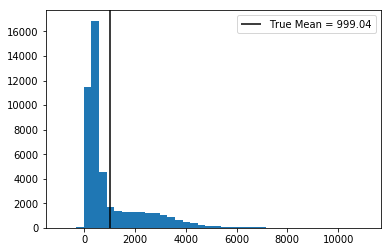

In [8]:
plt. hist(office['sales'], bins = 40)
plt.ylim(*plt.ylim())
plt.vlines(np.mean(office['sales']), *plt.ylim(), label = "True Mean = " + str(round(np.mean(office['sales']),2)))
plt.legend();

The distribution above is skewed. However, see below of how well the sample means fall around the population mean.

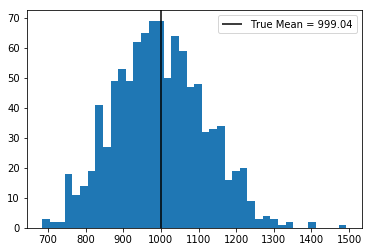

In [9]:
plt.hist(samp_means, bins = 40)
plt.ylim(*plt.ylim())
plt.vlines(np.mean(office['sales']), *plt.ylim(), label = "True Mean = " + str(round(np.mean(office['sales']),2)))
plt.legend();

While, the sample means look approximately normally distributed, with a mean at the population mean. Let's change "n" to gain more of a sense of how this distribution changes.  

The below code will take samples of 10, 20, 30, 40, 50, 75, 100, 250, and 500 observations from sales, and calculate their mean 1000 times. Finally, ploting the distributions.  

Note, the CLT requires $n\ge30$

CPU times: user 8.9 s, sys: 556 ms, total: 9.46 s
Wall time: 9.34 s


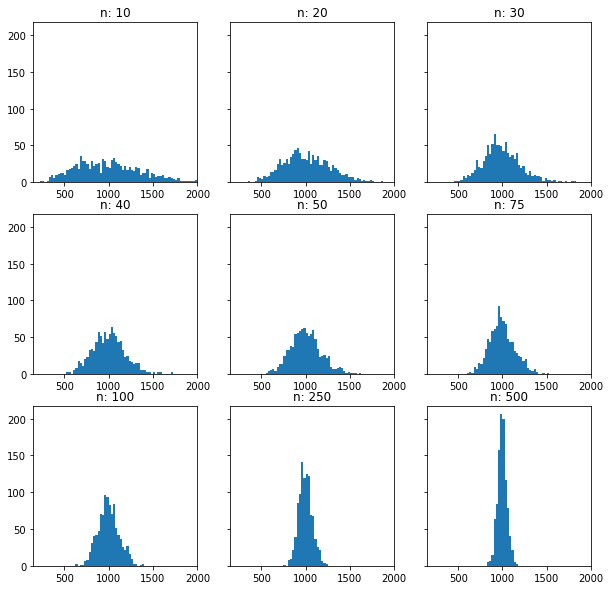

In [10]:
%%time
# Create Figure
fig, *axs = plt.subplots(3,3, sharex= False, sharey=True, figsize = (10,10))

# Vary n, plot in different locations
for i, ax in zip([10,20,30,40,50,75,100,250,500], axs[0].flatten()):
    # Find Sample means
    s_means = [
        np.mean( np.random.choice(office['sales'], size = i, replace = False))
        for j in range(1000)
    ]
    
    # Plot histogram with consistent "bins"
    ax.hist(s_means, bins = range(150,2001, 25))
    ax.set_xlim(150,2000)

    tit = "n: " + str(i)
    ax.set_title(tit)

While all of the sample means are appoximately centered at the population mean of \~1000, the distribution significantly tightens as "n" increases.  

While the above provides a visual demonstration of the CLT, using Python, a more focused investigation is possible.  

Returning to the original 1,000 means calculated from samples of 100 observations, the below cell calculates the population mean and population standard deviation, along with the mean of the sample means, and the standard deviation of the sample means.  

From the CLT, we expect that the population mean will equal the mean of the sample means. We also expect that the standard deviation of the sample means will be equal to the population standard deviation divided by the square root of n. 

In [11]:
pop_mean = np.mean(office['sales']) # This is mu
pop_standard_dev = np.std(office['sales']) # This is sigma

samp_mean = np.mean(samp_means) # CLT tells us this should be ~mu
samp_standard_dev = np.std(samp_means) # CLT Says this should be sigma / n

sig_div_n = pop_standard_dev / np.sqrt(100)

print("mu: ", pop_mean)
print("sigma: ", pop_standard_dev)
print("Mean of sample Means: ", samp_mean)
print("Standard Deviation of Sample Means: " , samp_standard_dev)

print("Sigma / sqrt(n); Should be about the same as Standard Deviation of Sample Means: ", sig_div_n)

print("\nPercent difference in mean of sample means and poulation mean: ", round((1-samp_mean /pop_mean)*100,3),"%"  )
print("\nPercent difference in population standard deviation / sqrt(n) to standard deviation of sample means: ",
      round((1-samp_standard_dev /sig_div_n)*100,3),"%"  )

mu:  999.0407246751569
sigma:  1185.9985229774793
Mean of sample Means:  997.3048167000001
Standard Deviation of Sample Means:  120.86083463892739
Sigma / sqrt(n); Should be about the same as Standard Deviation of Sample Means:  118.59985229774793

Percent difference in mean of sample means and poulation mean:  0.174 %

Percent difference in population standard deviation / sqrt(n) to standard deviation of sample means:  -1.906 %


The promises of the CLT appear to have held; the equivalences are not perfect, but they're very close.  

### Calculating Necessary Sample Size

The eventual focus of the lectures, and the activities in this assignment concern choosing an "n" - a sample size for estimating a population mean.  

Below estimating the mean of "sales" is demonstrated. The questions will ask you about estimating the mean of "transactions".  

#### Estimating the "Sales" Mean

Imagine that you have decided that the sample mean of the sales should not have an error greater than $\pm\$50$. Further, you want 92.5% confidence that error will not be exceeded.  

To calculate the necessary sample size, the following steps will be taken:  

1. Estimate Standard Deviation from Estimated Range  
2. Find the "z" multiplier  
3. Solve for "n" using Standard Deviation and "z" multiplier  

#### Estimating the Standard Deviation

First, we find an estimate for the population standard deviation from the expected range of observed sales figures.  

Remember, the estimate for the standard deviation is **the estimated range divided by six.**  

Two notes on this estimation: in a normal distribution, $99.73\%$ of the data will be contained within $\pm 3$ standard deviations. Furthermore, [Chbyshev's Inequality](https://en.wikipedia.org/wiki/Chebyshev's_inequality) also tells us that in *any* distribution, at least $89\%$ of values must lie within three standard deviations of the mean.    

From our previous data, we find that the range of sales spans from:

In [12]:
print("Min Sales: ", np.min(office['sales']))
print("Max Sales: ", np.max(office['sales']))

print("Range of sales: ", np.ptp(office['sales']))
print("Standard Deviation of Sales: ", np.std(office['sales']))

Min Sales:  -919.83
Max Sales:  11069.76
Range of sales:  11989.59
Standard Deviation of Sales:  1185.9985229774793


To be conservative, estimate the range as 25% larger, increasing from ~12,000 to 15,000.  

Thus our estimate for the standard deviation will be $\frac{15,000}6 = 2,500$  

Note below the "estimated" standard deviation of the sales data compared with the actual standard deviation

In [13]:
print("Standard Deviation of Sales: ", round(np.std(office['sales']),2))
print("\nEstimated Standard Deviation from ACTUAL Range of Sales: ", np.ptp(office['sales'])/6)
print("Estimated Standard Deviation from ESTIMATED Range of Sales: ", 2500)
print("\nProportion of Estimates to Actual Standard Deviation: ")
print("Proportion with Estimate from ACTUAL Range", round((np.ptp(office['sales'])/6)/np.std(office['sales']),2))
print("Proportion with Estimate from ESTIMATED Range", round(2500/np.std(office['sales']),2))

Standard Deviation of Sales:  1186.0

Estimated Standard Deviation from ACTUAL Range of Sales:  1998.265
Estimated Standard Deviation from ESTIMATED Range of Sales:  2500

Proportion of Estimates to Actual Standard Deviation: 
Proportion with Estimate from ACTUAL Range 1.68
Proportion with Estimate from ESTIMATED Range 2.11


As will be shown soon, estimates of the standard deviation that are 1.5 - 2 times the true standard deviation can have a significant impact on the sample size calculation.  

With a maximum desired error of \$50, we can start to fill the equation motivated by the lecture:

$$Error = Z_{\alpha/2} * \frac{\sigma}{\sqrt{n}}$$

$$50 = Z_{\alpha/2}*\frac{2500}{\sqrt{n}}$$  

#### Calculation "z" Multiplier

Above, the decision was made that a confidence level of $92.5\%$ is desired.

Let's revisit the concept of z-scores as we go about calculating that z-multiplier for a $92.5\%$ confidence level.  

-------------------------

Traditionally, z-scores are found using a z-table found, for example at [z-table.com](http://www.z-table.com) (Note, all pictures of z-tables are from z-table.com) However, Python offers other avenues for finding z-scores.  

First: What is a z-score?  

Let's look at a couple of examples. Note, all of these examples show the standard normal with mean = 0 and standard deviation of 1. 


On the z-table, we can look up a particular z-score. For example, first consider a z-score of .62.  

Below, on the right you see a snippet of a z-table with the value for .62 highlighted.  

On the left is a graph of the PDF with everything up to .62 standard-deviations shaded.  

Note how the shaded portion coresponds to ~73% of the distribution -- the value found on the z-table

![ex1](./assets/zScoreEx.PNG)  

Below we see the same information, except for a z-score of -.62 instead of .62. Note the mirroring, due to the fact the distribution is symmetric.
![ex2](./assets/zscoreEx3.png)  


Thus, the .7324 associated with a z-score of .62 functionally says "73.24% of all observations will be between $-\infty$ and $\mu + .62$."  

The .2676 associated with the z-score of -.62 indicates that "26.76% of all observations will be between $-\infty$ and $\mu - .62$."

### The stats Package
The "`stats`" package allows you to find these values in Python.  

The "`stats`" package was already imported above.  

Because we are interested in the normal distribution, the sytax for calls to stats will be: "`stats.norm.<func>`"  


In [14]:
# Find the "z-table" value for .62
# Use the function `stats.norm.cdf()`
# `cdf` stands for "Cumulative Density Function"
print("Value for .62; stats.norm.cdf(.62): ",stats.norm.cdf(.62))

# Find the "z-table" value for -.62
print("Value for -.62; stats.norm.cdf(-.62): ",stats.norm.cdf(-.62))

# Finding z-score associated with each proportion.
# Use ppf (Percent Point Function)
print("\n\nz-score associated with proportion:\n")
print("stats.norm.ppf(.7324): ", stats.norm.ppf(.7324))
print("stats.norm.ppf(.2676): ", stats.norm.ppf(.2676))

Value for .62; stats.norm.cdf(.62):  0.732371106531017
Value for -.62; stats.norm.cdf(-.62):  0.26762889346898305


z-score associated with proportion:

stats.norm.ppf(.7324):  0.6200877754042505
stats.norm.ppf(.2676):  -0.6200877754042504


There is still one more step before finding the z-score for the 92.5% confidence interval.  Take a look at 95% confidence interval illustrated below:
![95%](./assets/zscoreEx4.PNG)  

Note how the *middle* 95% of data are included in the shaded region. The z-score of 1.96 should look familiar from lecture.  

Thus, for our 92.5% confidence interval, we need to find the z-score such that the area between $\mu-z$ and $\mu + z$ contains 92.5% of the data.  

The first thing to notice is that the un-shaded tails above each contain $\frac12$ of the 5% of data absent from the interval. Thus, to yeild the 1.96 we can the `stats` function demonstrated above, asking Python to compute `stats.norm.ppf(.975)`.  

.975 was calulated thusly:  

$$1-((1-.95)/2) = 1-(.05/2) = 1-.025 = .975$$  

Similarly, due to the symmetry of the normal distribution, we might ask `.ppf()` for the value associated with $1-.975$

In [15]:
print("stats.norm.ppf(.975): " , stats.norm.ppf(.975))
print("stats.norm.ppf(.025): " , stats.norm.ppf(.025))

stats.norm.ppf(.975):  1.959963984540054
stats.norm.ppf(.025):  -1.9599639845400545


Alternatively, "`stats`" provides a function called "`.interval()`" Which gives the two z-scores for the endpoints of the interval provided.

In [16]:
print("stats.norm.interval(.95): ", stats.norm.interval(.95))

stats.norm.interval(.95):  (-1.959963984540054, 1.959963984540054)


Having calculated the z-score of the 95% interval one more example before returning to the 92.5% confidence interval.  

Suppose You wanted to find the correct multiplier for a 90% level of confidence using the above methods.  

Using "`.interval`" we just need to enter in `.9`, Using "`.ppf`" the values are:  

$ 0 + (1-.9)/2 = .05$  
and  
$1 - (1-.9)/2 = .95$.  

That centered 90% goes from 5% to 95%.  

In [17]:
# Use "interval" to return the lower and upper z-scores of the specified
# sized interval centered at the mean
print(".interval(.90):", stats.norm.interval(.90))

# Use ppf (Percent Point Function) to find the z-score(s) of 
# the specified percentage. Note that 5% and 95% are used to
# yeild the centered 90% interval z-scores
print("\n.ppf([.05, .95]): ", stats.norm.ppf([.05,.95]))

.interval(.90): (-1.6448536269514729, 1.6448536269514722)

.ppf([.05, .95]):  [-1.64485363  1.64485363]




As a proportion, 92.5% is equal to .925  

For using the `.ppf()` functions, the calculation for the values to input are below.

$ 1- ((1-.925)/2) = 1-(.075/2) = 1- .0375 = .9625$  
$1-.9625 = .0375$

In [18]:
print("stats.norm.ppf(.9625): " , stats.norm.ppf(.9625))
print("stats.norm.ppf(.0375): " , stats.norm.ppf(.0375))
print("stats.norm.interval(.925): ", stats.norm.interval(.925))

stats.norm.ppf(.9625):  1.7804643416920256
stats.norm.ppf(.0375):  -1.7804643416920256
stats.norm.interval(.925):  (-1.7804643416920256, 1.7804643416920256)


Thus the z-multiplier for the 92.5% confidence interval is about 1.78.  

Continuing to fill out the equation to calculate the needed sample size:  

$$50 = Z_{\alpha/2}*\frac{2500}{\sqrt{n}}$$ 
$$50 = 1.78 * \frac{2500}{\sqrt{n}}$$
$$n = 1.78^2 * (\frac{2500}{50})^2$$
$$n = 1.78^2 * 50^2$$

The final calculation below for n

In [19]:
# Finish calculation for n
(1.78**2)* (50**2)

7921.0

According to this calculation, in order to be 92.5% confident that the sample mean of "sales" falls within \$50 of the population mean of sales, a sample of 7,921 observations would need to be taken.  

That number should seem high. Let's visualize this result and look at the impact of estimated standard deviation on the calculation.

First: What is our concern? The error of the sample mean.   

The desire is to have $92.5\%$ confidence that our sample mean falls within \$50 of the actual population mean.  

We calculated that 7,921 pieces of data would fulfill that desire. Below, 7,921 samples from "sales" are taken and averaged 1,000 times.

In [20]:
# Create list to store averages
samp_means_7921 = []

# Perform sampling 1000 times
for i in range(1000):
    # Find mean of sample of siz 7921
    samp_mean = np.mean(np.random.choice(office['sales'], size = 7921, replace = False))
    
    # Save mean in list
    samp_means_7921.append(samp_mean)

# Calculate actual population mean
pop_mean = np.mean(office['sales'])

The means of those 1000 draws are visualized below.

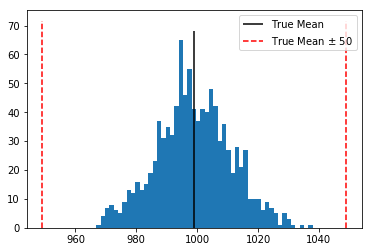

In [21]:
# Plot histogram of sample means
plt.hist(samp_means_7921, bins = 50)

# Plot vertical lines corresponding to mean and plus/minus 50
plt.vlines(pop_mean, *plt.ylim(), label = "True Mean")
plt.vlines([pop_mean+50, pop_mean - 50], *plt.ylim(), colors= 'r', linestyles= '--', label = "True Mean $\pm$ 50")

# Add legend leveraging "label" arguments above
plt.legend();

Instead of $92.5\%$ of sample means falling between $\mu\pm 50$, $100\%$ of the means fall in that interval.  

This is not too unexpected, remember, the sample size of 7,921 was calculated using an *estimate* of the population standard deviation.  

Below, two more sample sizes are calculated:
- Use an estimate of standard deviation derived from the observed range of the sales data divided by 6  
- Use the observed standard deviation from the sales data.

In [22]:
est_sd = np.ptp(office['sales'])/6
true_sd = np.std(office['sales'])

print("True SD: ", true_sd, "\nEstimated SD: ", est_sd, sep = '')

True SD: 1185.9985229774793
Estimated SD: 1998.265


With the two above standard deviations, re-calculate the samples needed for that 92.5% confidence of and error of 50 or less:

In [23]:
# Calculate using true standard deviation:

true_sd_samp = (1.78 **2) *( (true_sd / 50)**2)

# Calculate using estimated standard deviation

est_st_samp = (1.78 **2) *( (est_sd / 50)**2)

print("Needed sample calculated from True SD: ", round(true_sd_samp),
      "\nNeeded sample calculated from Estimated SD: ", round(est_st_samp), sep = '')

Needed sample calculated from True SD: 1783.0
Needed sample calculated from Estimated SD: 5061.0


Looking at the above, it is clear that standard deviation has a huge impact on the needed number of datapoints.  
The visual below, depicts the relationship between standard deviation and sample size.

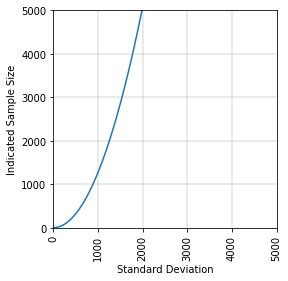

In [24]:
# Create 200 evenly spaced numbers between 0 and 2500
# This represents the standard deviations
st_devs = np.linspace(0, 2500, num = 200)

# Calculate sample size indicated by standard deviations
samp_sizes = (1.78**2) * ((st_devs/50)**2)

# Plotting figure
plt.figure(figsize = (4,4)) # Define size of figure
plt.plot(st_devs, samp_sizes) # Plot line


# Define limits of plot
plt.xlim(0,5000)
plt.ylim(0,5000)

# Plot gridlines
for g in range(1000,4001,1000):
    plt.vlines(g,*plt.ylim(), alpha = .1 )
    plt.hlines(g,*plt.xlim(), alpha = .1 )
    
# Modify axis labeling
plt.xticks(rotation = 90)
plt.xlabel("Standard Deviation")
plt.ylabel("Indicated Sample Size");

That's quite the exponential curve!  

Now we'll perform the same sampling test with the sample sizes indicated by the new estimate of the standard deviation and the true standard deviation.

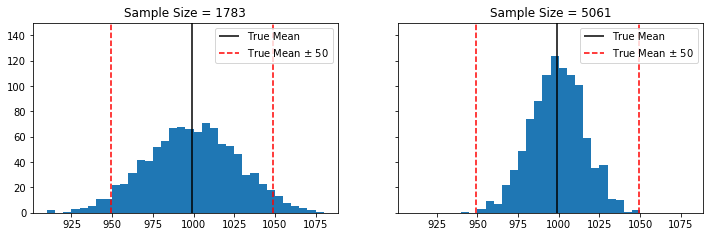

In [25]:
# Create Dictionary to store sample means
samp_means= {1783:[], 5061:[]}

# Take 1000 Draws of each sample size
for i in range(1000):
    for s in [1783, 5061]:
        samp_means[s].append( np.mean(np.random.choice(office['sales'], size = s, replace = False)))

# Calculate True mean
pop_mean = np.mean(office['sales'])

# Set up plot
fig, (axs) = plt.subplots(1,2, sharex = True, sharey = True, figsize = (12,3.5))

for samp_size, ax in zip(samp_means.keys(), axs):
    
    # Plot histogram of sample means
    ax.hist(samp_means[samp_size], bins = range(910,1081, 5))
    ax.set_title("Sample Size = " + str(samp_size))

    ax.set_ylim(0,150)
    
    # Plot vertical lines corresponding to mean and plus/minus 50
    ax.vlines(pop_mean, *plt.ylim(), label = "True Mean")
    ax.vlines([pop_mean+50, pop_mean - 50], *plt.ylim(), colors= 'r', linestyles= '--', label = "True Mean $\pm$ 50")

    # Add legend leveraging "label" arguments above
    ax.legend(loc = "upper right");

Note, the above visualization will change every time the cell is run, due to new samplings being performed.  

But, again, when taking 5061 samples, as indicated by the "estimated" standard deviation, none (or very very few) of the means fall outside of the true mean plus/minus 50.

Now let's see how many of the sample means of 1783 sampless fall outside of the $\pm50$ window. Given the 1000 draws and the $92.5\%$ confidence level we would expect roughly 75 to fall outside of the window.  

In [26]:
# Using list comprehension:
# Save all values that are greater than the mean + 50 or less than the mean - 50
outside_limits = [s for s in samp_means[1783] if s > pop_mean + 50 or s < pop_mean -50]
print("There were", len(outside_limits), "sample means that fell outside of the window when sampling")

There were 72 sample means that fell outside of the window when sampling


Given a particular sample, the above will change.  

Below is a barplot of the number of sample means outside the $\pm50$ window, given 1,000 different iterations of 1,000 sample means calculated from draws of 1,783, and 5,061 samples. 
![Outside](./assets/outside.PNG)  

### Questions
For the graded part of this assignment, you will be asked to answer questions about the "transactions" data in the "office" dataset. The questions will involve performing the calculations demonstrated above and in the lecture.

The "transactions" data can be accessed in the same way that 'sales' was accessed in the examples above. An object called "trans" is also created below which contains the same transaction data.

See below for a demonstration of how to access that data:

In [27]:
# A variable called "trans" now contains all the transaction data
trans = office['transactions'].values

print("Printing the first 10 element of 'trans': ", trans[:10],
     "\nAnd its mean: ", np.mean(trans[:10]), sep = "")

# If you want to access the transaction data in a similar manner to the "sales" data
# The below sytax will also work.

print("\nPrinting the first 10 elements of transaction data from 'office': \n", office['transactions'][:10],
      "\nAnd its mean: ", np.mean(office['transactions'][:10]),sep = "")

print("\nChecking: are the mean of 'trans' and 'office['transactions']' the same?",
      np.mean(trans) == np.mean(office['transactions']))

Printing the first 10 element of 'trans': [20  2 12  9  1 18 11  1  6  3]
And its mean: 8.3

Printing the first 10 elements of transaction data from 'office': 
0    20
1     2
2    12
3     9
4     1
5    18
6    11
7     1
8     6
9     3
Name: transactions, dtype: int64
And its mean: 8.3

Checking: are the mean of 'trans' and 'office['transactions']' the same? True


#### Question 1

In [28]:
### GRADED
### What is the true population mean of the "transaction" data?
### Hint: Use a numpy function

### Assign float to ans1
### YOUR ANSWER BELOW

ans1 = np.mean(office['transactions'])

In [29]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 2

In [30]:
### GRADED
### What is the true population standard deviation of the "transaction" data?
### Hint: Use a numpy function

### Assign float to ans1
### YOUR ANSWER BELOW

ans1 = np.std(office['transactions'])

In [31]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 3

In [32]:
### GRADED
### Assume that the number of transactions includes values spanning from 1 to 66
### Thus the range is 66

### In that case, where the range of transactions is 66, estimate the standard deviation
### of the transactions using the range 66 with the method described above and in lecture.

### Assign number, int or float, to ans1
### YOUR ANSWER BELOW

ans1= 66/6

In [33]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 4

In [34]:
### GRADED
### If a 95% level of confidence is required, what z-score should be used for
### calculating the required number of samples to achieve a specific error
### Hint: use a method from the stats package

### Assign POSITIVE float to ans1; answer checked to 4 decimal places
### YOUR ANSWER BELOW

ans1 = round(stats.norm.ppf(.975),4)

In [35]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 5

In [36]:
### GRADED

### Calculate the sample size required to achieve an error rate of plus/minus 2 or less with 90% confidence
### Use the below parameters:

### Estimated standard deviation of 10

### NOTE: the convention for sample size is to round a fractional sample size up to the next highest integer
### NOTE: to round up a fractional value use np.ceil(value)
### Assign int to ans1
### YOUR ANSWER BELOW

# Estimate standard deviation from sample range
estimated_sd = 10

# 90% confidence interval z-multiplier
z_mult = round(stats.norm.ppf(.95),4) #1.64485

#Estimate error
est_error = 0.02

samp_size = ((est_error/z_mult) / estimated_sd)**2

ans1 = 68.0 ##float(np.ceil(samp_size))

In [37]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Now we'll take this question from the other side.  

Given a sample size, and given a range of responses, estimate the error of the sample mean.

Remember, the equation is:
$$EstError = z_{\alpha/2}*\frac{\sigma}{\sqrt{n}}$$

Let's take a sample of 100 values from the transactions, estimate the error, and find the true error. The output from below will change every time the cell is run.

In [38]:
# Define sample size
samp_size = 100

# Take sample
trans_sample = np.random.choice(office['transactions'], size = samp_size, replace = False)

# Find range of sample
observed_range = np.ptp(trans_sample)

# Estimate standard deviation from sample range
estimated_sd = observed_range / 6

# 95% confidence interval z-multiplier
z_mult = 1.96

est_error = z_mult * (estimated_sd / np.sqrt(samp_size))

true_error = np.mean(office['transactions']) - np.mean(trans_sample)
print("Estimated 95% error: $\pm$", est_error, "\nTrue error: ", true_error)

Estimated 95% error: $\pm$ 0.9146666666666666 
True error:  0.21107462236300556


#### Question 6

In [39]:
### GRADED
### If the range of a sample is 240, what would be the estimate of the standard deviation?
### Refer to and use the technique used above

### Assign numeric answer to ans1

### YOUR ANSWER BELOW

sample_range = 240

ans1 = sample_range / 6

In [40]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 7

In [41]:
### GRADED
### Assume an estimated standard deviation of 50 from a sample size of 144
### Given the estimated standard deviation, and sample size:
### Estimate the 95% confidence interval error.
### NB: Use 1.96 as the z_multiplier for estimating the error.

### Assign numeric answer to ans1

### YOUR ANSWER BELOW

est_sd = 50
samp_size = 144
z_mult = 1.96

ans1 = z_mult * (est_sd / np.sqrt(samp_size))

In [42]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
